In [ ]:
# import re
# from sklearn.externals import joblib # or use: from joblib import load, if you face deprecation warnings

# # Example feature extraction function
# def extract_features(password):
#     features = {
#         'length': len(password),
#         'uppercase': sum(1 for c in password if c.isupper()),
#         'lowercase': sum(1 for c in password if c.islower()),
#         'nums': sum(1 for c in password if c.isdigit()),
#         'special_chars': sum(1 for c in password if re.match(r'\W', c))
#     }
#     return [features['length'], features['uppercase'], features['lowercase'], features['nums'], features['special_chars']]

# # Load the trained model
# model = joblib.load('your_model_path.pkl')

# # Function to predict password strength
# def predict_password_strength(password):
#     features = extract_features(password)
#     prediction = model.predict([features])
#     return prediction

# # Test the function
# password = "YourPassword123!"
# strength = predict_password_strength(password)
# print(f"Predicted strength for '{password}':", strength)


In [ ]:
import re
def extract_features(password):
    features = {
        'length': len(password),
        'uppercase': sum(1 for c in password if c.isupper()),
        'lowercase': sum(1 for c in password if c.islower()),
        'nums': sum(1 for c in password if c.isdigit()),
        'special_chars': sum(1 for c in password if re.match(r'\W', c))
    }
    return [features['length'], features['uppercase'], features['lowercase'], features['nums'], features['special_chars']]

passd = 'Aayush123!!'
extract_features(passd)


df['length'] = df['length'].astype(int).apply(conv_length)

[11, 1, 5, 3, 2]

In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
path ='/content/drive/MyDrive/IS675_data/data.csv'
df=pd.read_csv(path,on_bad_lines='skip')
#df['password'] = df['password'].fillna("")  # Fill NaN values

I have the password column.
I want to have -
  number of lower case
  number of upper case
  number of numbers
  number of special case
  password length and strength
  


In [ ]:
df.shape

(669640, 2)

In [ ]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['password'].apply(len)
df['uppercase'] = df['password'].apply(lambda x: len([c for c in x if c.isupper()]))
df['lowercase'] = df['password'].apply(lambda x: len([c for c in x if c.islower()]))
df['nums'] = df['password'].apply(lambda x: len([c for c in x if c.isdigit()]))
df['special_chars'] = df['password'].apply(lambda x: len([c for c in x if not c.isalnum()]))

In [ ]:
df['strength'].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

In [ ]:
def strength_class(n):
  if n == 1:
    return "medium"
  elif n == 0:
    return 'low'
  else:
    return 'high'

df['strength'] = df['strength'].apply(strength_class)

In [ ]:
mean_of_valcounts=(df['strength'].value_counts().sum())

In [ ]:
df.isna().sum()

password         0
strength         0
length           0
uppercase        0
lowercase        0
nums             0
special_chars    0
dtype: int64

In [ ]:
df['strength']=df['strength'].astype('category')

In [ ]:
df.dtypes

password           object
strength         category
length              int64
uppercase           int64
lowercase           int64
nums                int64
special_chars       int64
dtype: object

In [ ]:
df.head()

,password,strength,length,uppercase,lowercase,nums,special_chars
0,kzde5577,medium,8,0,4,4,0
1,kino3434,medium,8,0,4,4,0
2,visi7k1yr,medium,9,0,7,2,0
3,megzy123,medium,8,0,5,3,0
4,lamborghin1,medium,11,0,10,1,0


Here we would be dealing with outliers and trash data

In [ ]:
def main_calc_0(num_col):
    # min q1q2q3 max and iqr
    min_val = num_col.min()
    q1 = num_col.quantile(0.25)
    old_mean=num_col.mean()
    q2 = num_col.median()
    q3 = num_col.quantile(0.75)
    max_val = num_col.max()
    iqr = q3 - q1

    # find outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = num_col[(num_col < lower_bound) | (num_col > upper_bound)]

    # replace outliers with the min and max
    num_col_new = num_col.copy()
    num_col_new[num_col_new < lower_bound] = q2
    num_col_new[num_col_new > upper_bound] = q2
    #num_col_new.fillna(num_col_new.median(), inplace=True)

    # mean of the new column
    new_mean = num_col_new.mean()
    return num_col_new

In [ ]:
df.shape

(669639, 7)

In [ ]:
df[['length', 'uppercase', 'lowercase', 'nums',
       'special_chars']]=df[['length', 'uppercase', 'lowercase', 'nums',
       'special_chars']].apply(main_calc_0)

In [ ]:
df.shape

(669639, 7)

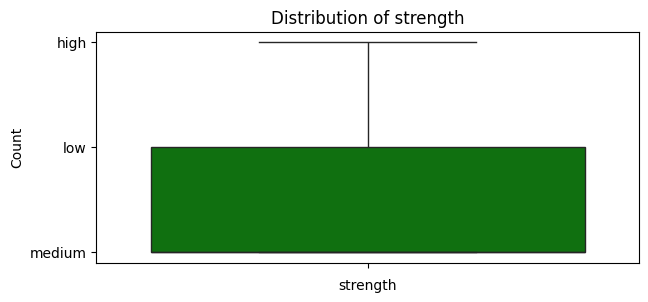

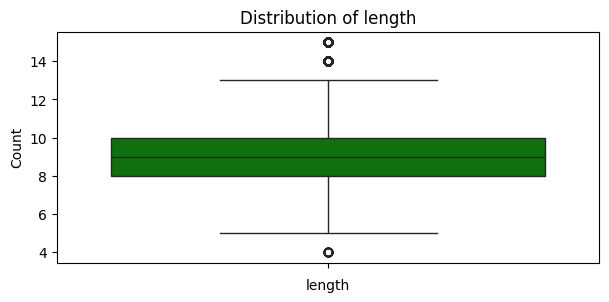

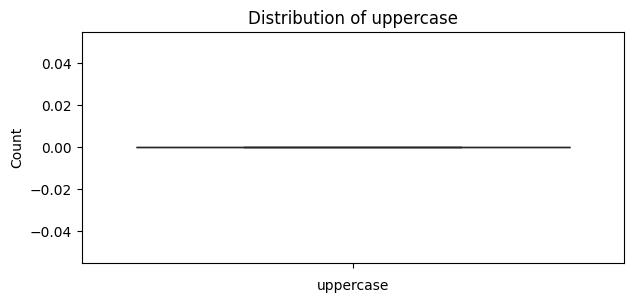

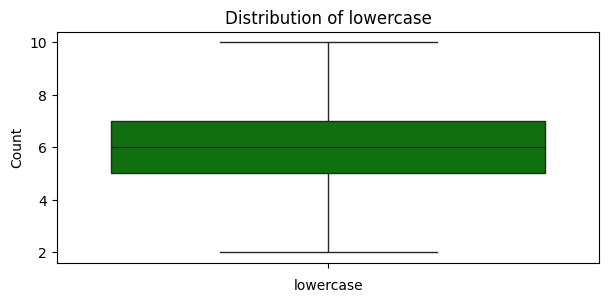

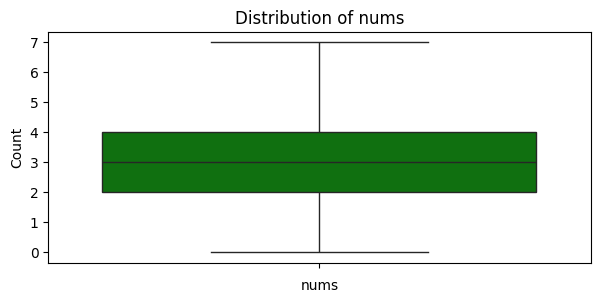

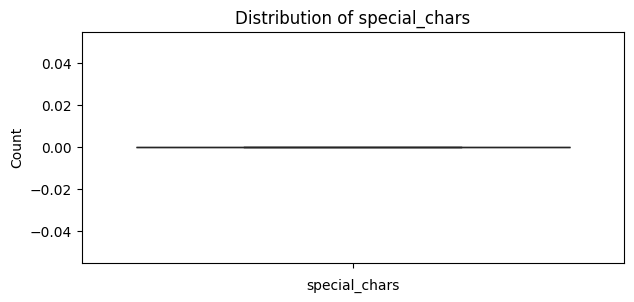

In [ ]:
import matplotlib.pyplot as plt
cols = ['strength', 'length', 'uppercase', 'lowercase', 'nums', 'special_chars']

for i in cols:
    plt.figure(figsize=(7, 3))
    sns.boxplot(df[i],color='green')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()


#here convert

In [ ]:
def conv_length(length):
    if length == 0:
        return 'None'
    elif 1 <= length <= 5:
        return 'Short'
    elif 6 <= length <= 8:
        return 'Medium'
    elif 9 <= length <= 12:
        return 'Long'
    else:
        return 'Very Long'
df['length'] = df['length'].astype(int).apply(conv_length)

In [ ]:
def conv_rest(n):
    if n == 0:
        return 'None'
    elif 1 <= n <= 2:
        return 'Few'
    elif 3 <= n <= 5:
        return 'Some'
    elif 6 <= n <= 8:
        return 'Many'
    else:
        return 'Very Many'

df[['uppercase', 'lowercase', 'nums', 'special_chars']] = df[['uppercase', 'lowercase', 'nums', 'special_chars']].applymap(conv_rest)


In [ ]:
df.head()

,password,strength,length,uppercase,lowercase,nums,special_chars
0,kzde5577,medium,medium,None,Some,Some,None
1,kino3434,medium,medium,None,Some,Some,None
2,visi7k1yr,medium,long,None,Many,Few,None
3,megzy123,medium,medium,None,Some,Some,None
4,lamborghin1,medium,long,None,Very Many,Few,None


Here we are converting the data to categorical

In [ ]:
cols = ['strength', 'length', 'uppercase', 'lowercase', 'nums', 'special_chars']
for i in cols:
  if df[i].astype == 'category':
    pass
  else:
    df[i]=df[i].astype('category')

In [ ]:
df.dtypes

password           object
strength         category
length           category
uppercase        category
lowercase        category
nums             category
special_chars    category
dtype: object

In [ ]:
df['strength'].value_counts()

medium    496801
low        89701
high       83137
Name: strength, dtype: int64

In [ ]:
#identifying the minority class size.
minority_class_size = df['strength'].value_counts().min()

In [ ]:
minority_class_size

83137

In [ ]:
df['strength'].value_counts()

medium    496801
low        89701
high       83137
Name: strength, dtype: int64

In [ ]:
# Create a DataFrame for each class
class_0 = df[df['strength'] == 'low']
class_1 = df[df['strength'] == 'medium']
class_2 = df[df['strength'] == 'high']

In [ ]:
class_1.sample(5)

,password,strength,length,uppercase,lowercase,nums,special_chars
527962,123456poiuyt,medium,long,None,Many,Many,None
633216,deokabe98,medium,long,None,Many,Few,None
39554,tadasas123,medium,long,None,Many,Some,None
521832,xenodochius1,medium,long,None,Many,Few,None
431287,shadows14,medium,long,None,Many,Few,None


In [ ]:
# Downsample majority classes to match minority class size
class_0_downsampled = class_0.sample(n=minority_class_size, random_state=42)
class_1_downsampled = class_1.sample(n=minority_class_size, random_state=42)
# # No need to downsample the minority class (class_2 in this case)

In [ ]:
# # Concatenate all classes to form a new balanced DataFrame
balanced_df = pd.concat([class_0_downsampled, class_1_downsampled, class_2])

In [ ]:
balanced_df.keys()

Index(['password', 'strength', 'length', 'uppercase', 'lowercase', 'nums',
       'special_chars'],
      dtype='object')

In [ ]:
balanced_df.dtypes

password           object
strength         category
length           category
uppercase        category
lowercase        category
nums             category
special_chars    category
dtype: object

Splitting the dataset into training and testing dataset



In [ ]:
balanced_df

,password,strength,length,uppercase,lowercase,nums,special_chars
221611,73ptilp,low,medium,None,Some,Few,None
594416,kalem55,low,medium,None,Some,Few,None
221251,aca007,low,medium,None,Some,Some,None
500448,nopy98u,low,medium,None,Some,Few,None
615462,ac7i5ge,low,medium,None,Some,Few,None
...,...,...,...,...,...,...,...
669618,juanpaganini588@gmail.com,high,long,None,Many,Some,None
669619,tYAam8zg3Mg2AZ7a,high,long,None,Many,Some,None
669622,weslley.06888524,high,long,None,Many,Some,None
669627,sakaryal&#305;,high,very long,None,Many,Some,None


In [ ]:
# Create dummy variables for categorical variables and retain all other columns
df_dummies = pd.get_dummies(balanced_df, columns=balanced_df.select_dtypes(['category']).columns, drop_first=False)

In [ ]:
df_dummies.columns

Index(['password', 'strength_high', 'strength_low', 'strength_medium',
       'length_long', 'length_medium', 'length_short', 'length_very long',
       'uppercase_None', 'lowercase_Few', 'lowercase_Many', 'lowercase_Some',
       'lowercase_Very Many', 'nums_Few', 'nums_Many', 'nums_None',
       'nums_Some', 'special_chars_None'],
      dtype='object')

In [ ]:
target_var = ['strength']
target_columns = [col for col in df_dummies if col.startswith(target_var[0] + '_')]

In [ ]:
X = df_dummies.drop(columns=['password','strength_high', 'strength_low', 'strength_medium'])

In [ ]:
X.columns

Index(['length_long', 'length_medium', 'length_short', 'length_very long',
       'uppercase_None', 'lowercase_Few', 'lowercase_Many', 'lowercase_Some',
       'lowercase_Very Many', 'nums_Few', 'nums_Many', 'nums_None',
       'nums_Some', 'special_chars_None'],
      dtype='object')

In [ ]:
# Set 'strength' column as y
y = balanced_df['strength']

In [ ]:
y.value_counts()

high      83137
low       83137
medium    83137
Name: strength, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
X_train

,length_long,length_medium,length_short,length_very long,uppercase_None,lowercase_Few,lowercase_Many,lowercase_Some,lowercase_Very Many,nums_Few,nums_Many,nums_None,nums_Some,special_chars_None
24819,1,0,0,0,1,0,0,1,0,0,0,0,1,1
159389,1,0,0,0,1,0,1,0,0,0,0,0,1,1
331723,1,0,0,0,1,0,1,0,0,1,0,0,0,1
473610,0,1,0,0,1,0,0,1,0,1,0,0,0,1
431190,1,0,0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482914,0,1,0,0,1,0,0,1,0,1,0,0,0,1
536031,0,1,0,0,1,0,0,1,0,1,0,0,0,1
471634,1,0,0,0,1,0,1,0,0,1,0,0,0,1
31903,1,0,0,0,1,0,1,0,0,1,0,0,0,1


Logistic Regression

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = linear_model.LogisticRegression()

model.fit(X_train,y_train)

#Logistic_CrossValScore= cross_val_score(model, X_train, y_train, cv=5)
model.score(X_test,y_test)

0.758795581661087

Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DecisionTree = DecisionTreeClassifier(random_state=42)
#training the model
DecisionTree.fit(X_train, y_train)
#cross validation
CrossValScore= cross_val_score(DecisionTree, X_train, y_train, cv=5)
DecisionTree.score(X_test,y_test)

0.7672754244933143

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(DecisionTree, feature_names=list(X.columns))
print(tree_rules)

|--- length_medium <= 0.50
|   |--- length_very long <= 0.50
|   |   |--- lowercase_Some <= 0.50
|   |   |   |--- nums_Few <= 0.50
|   |   |   |   |--- lowercase_Very Many <= 0.50
|   |   |   |   |   |--- length_short <= 0.50
|   |   |   |   |   |   |--- nums_Many <= 0.50
|   |   |   |   |   |   |   |--- nums_Some <= 0.50
|   |   |   |   |   |   |   |   |--- lowercase_Few <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |   |   |--- lowercase_Few >  0.50
|   |   |   |   |   |   |   |   |   |--- class: low
|   |   |   |   |   |   |   |--- nums_Some >  0.50
|   |   |   |   |   |   |   |   |--- lowercase_Few <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |   |   |--- lowercase_Few >  0.50
|   |   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |--- nums_Many >  0.50
|   |   |   |   |   |   |   |--- lowercase_Many <= 0.50
|   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   | 

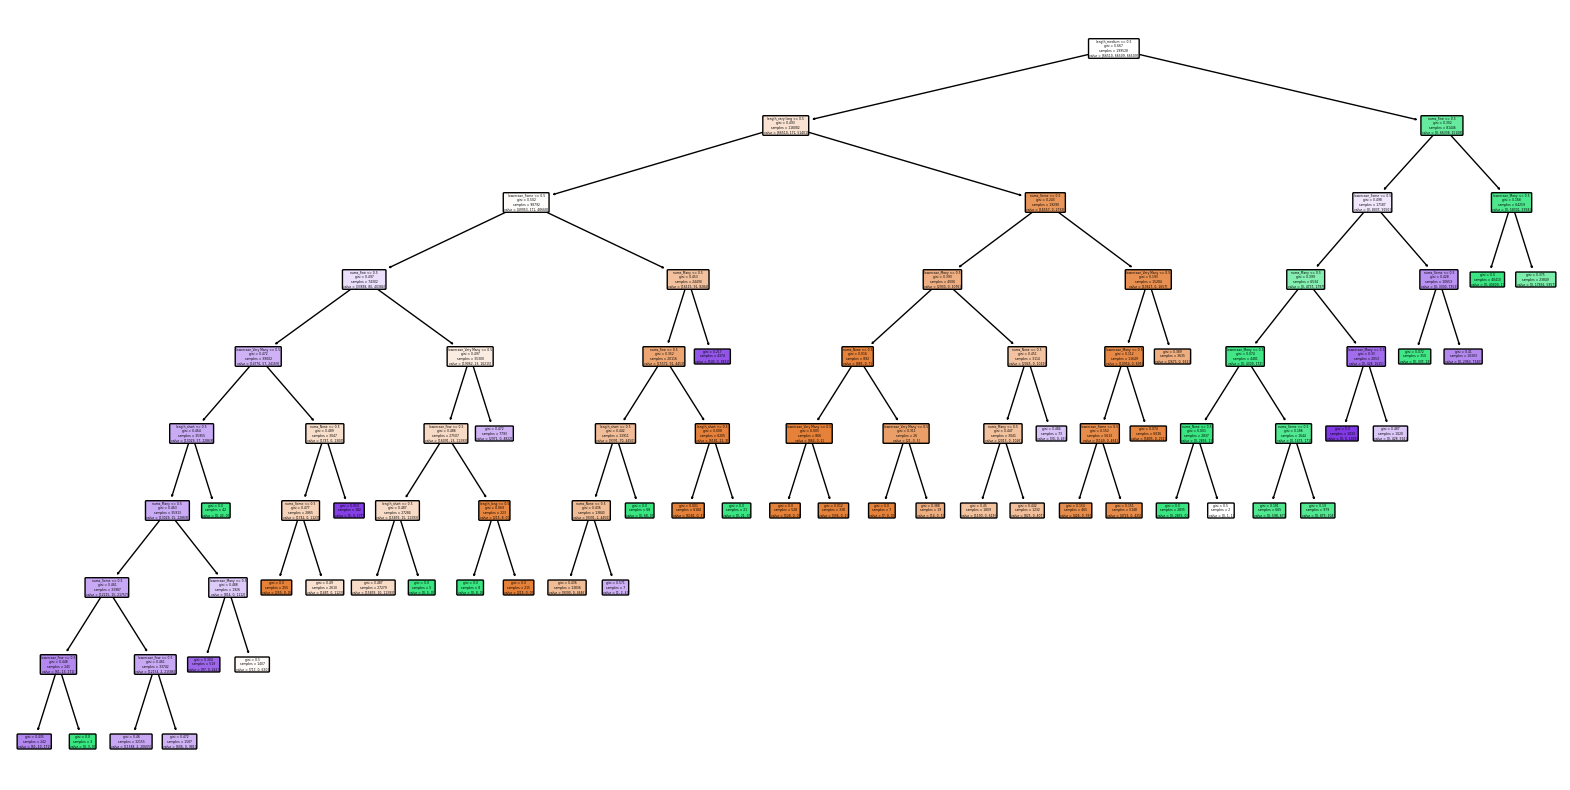

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(DecisionTree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

KNN - K Nearest Neighbours

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)

0.7664334542830222

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7672754244933143
